In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Load the dataset
credit_data = pd.read_csv('/Users/Katherine/Desktop/Georgia Tech/my_test_project/credit_default_project/UCI_Credit_Card.csv')
credit_data.head()  # Display the first few rows of the dataset

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [45]:
# Check for missing values
missing_values = credit_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


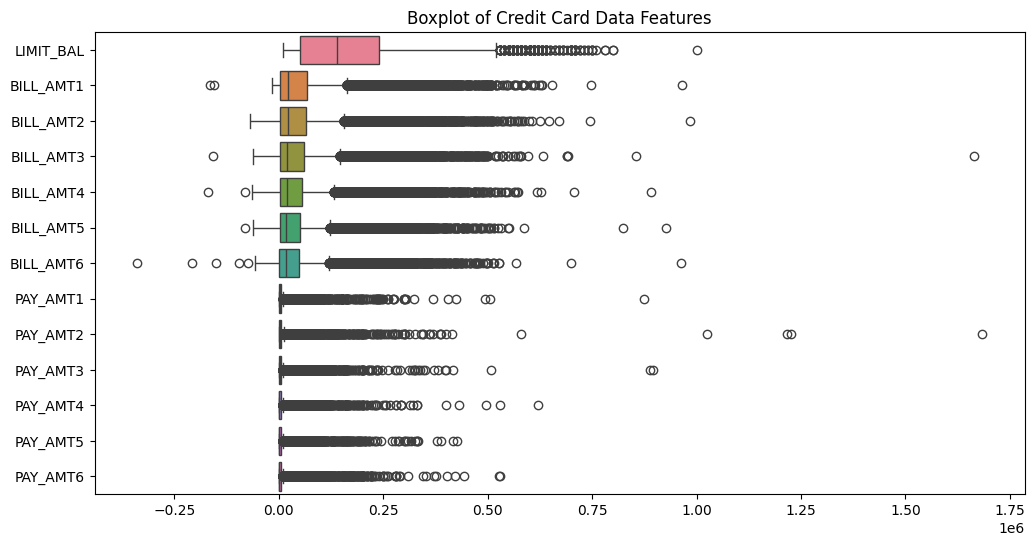

In [46]:
# Check outliers in the dataset by using boxplots
outlier_columns = credit_data[['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
                               'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
                               'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 
                               'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
plt.figure(figsize=(12, 6))
sns.boxplot(data=outlier_columns, orient='h')
plt.title('Boxplot of Credit Card Data Features')
plt.show()



/Users/Katherine/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/Katherine/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


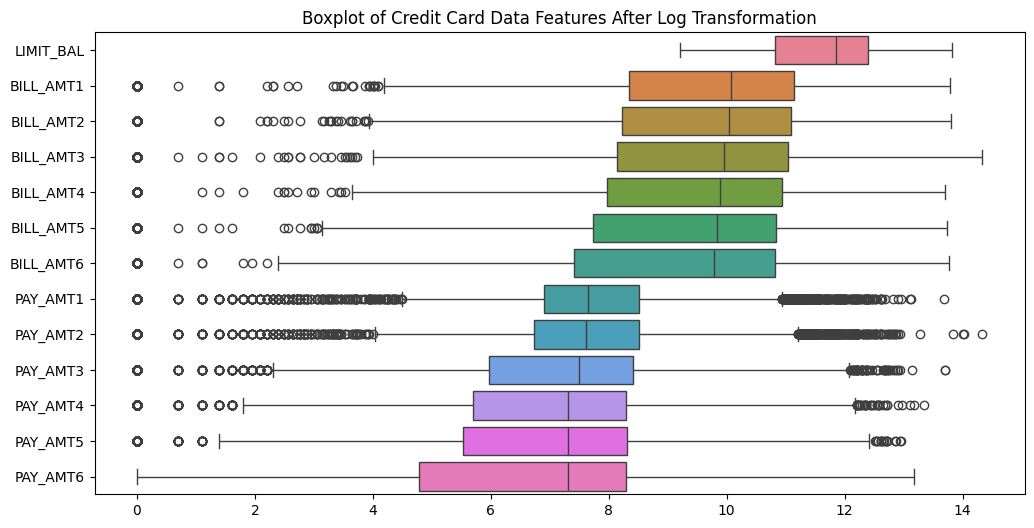

In [47]:
# log transformation to reduce the skewness/outliers
log_columns = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
               'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
               'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 
               'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

for col in log_columns:
    credit_data[col] = np.log1p(credit_data[col])
# Check the distribution of the data after log transformation
plt.figure(figsize=(12, 6))
sns.boxplot(data=credit_data[log_columns], orient='h')
plt.title('Boxplot of Credit Card Data Features After Log Transformation')
plt.show()


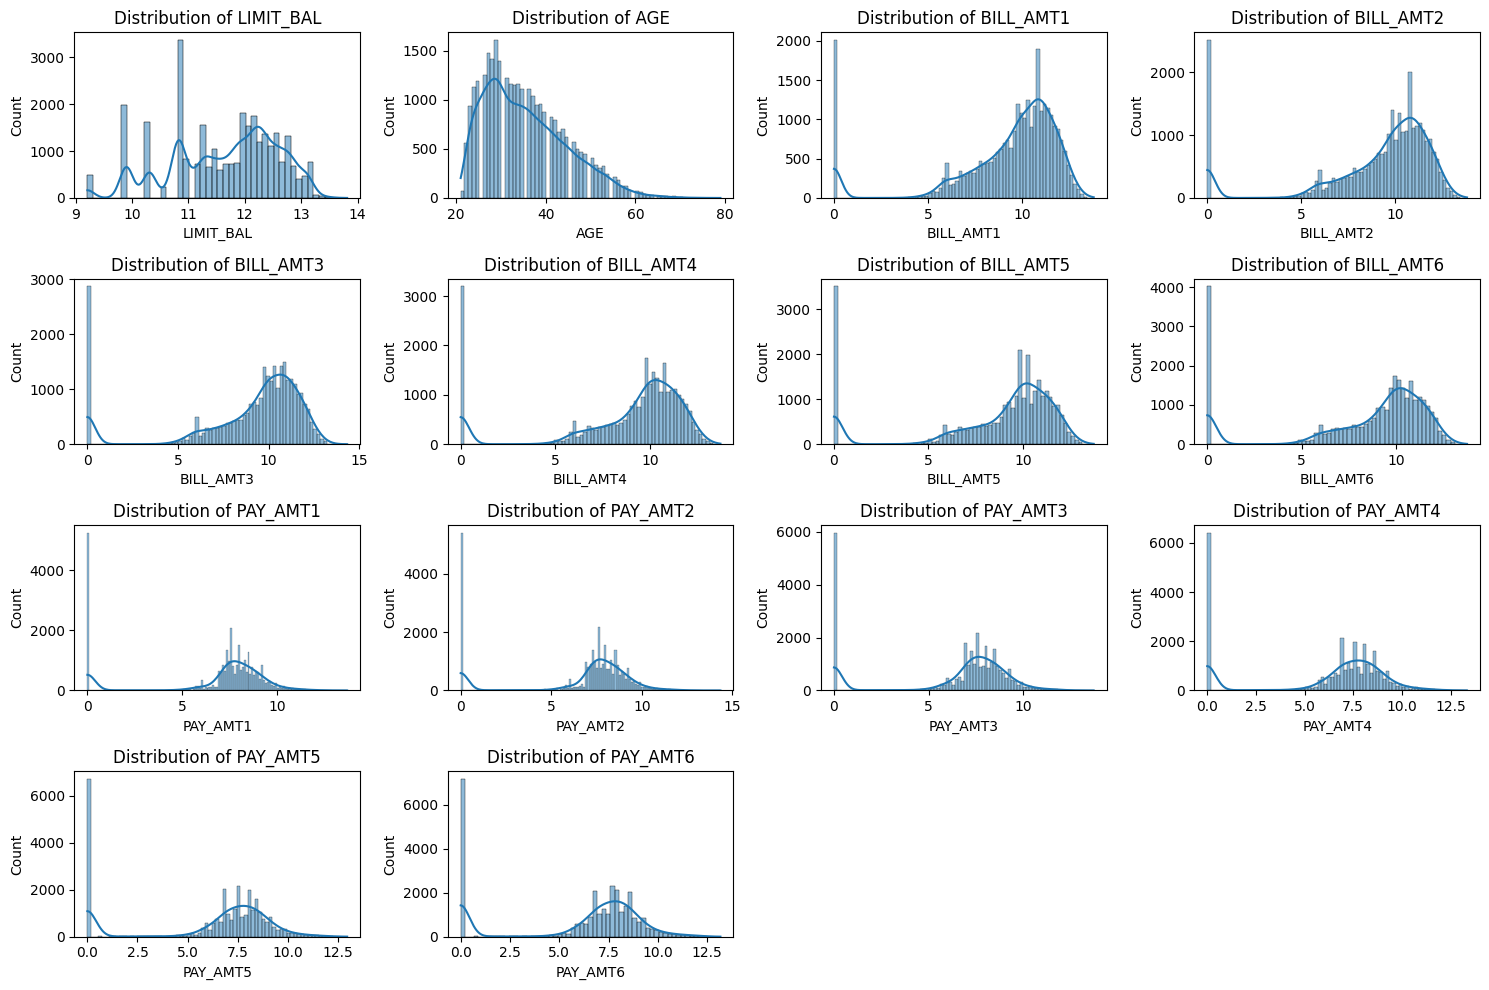

In [48]:
# Check the distribution of variables
dist_columns = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
                'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 
                'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

plt.figure(figsize=(15, 10))
for i, col in enumerate(dist_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(credit_data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [49]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaled_columns = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
                  'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
                  'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 
                  'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Replace inf/-inf with NaN, then fill NaN with 0 or another value
credit_data.replace([np.inf, -np.inf], np.nan, inplace=True)
credit_data.fillna(0, inplace=True)

scaler = StandardScaler()
credit_data[scaled_columns] = scaler.fit_transform(credit_data[scaled_columns]) 


In [50]:
# Split the dataset into 20% test, 40% traning and 40% validation
from sklearn.model_selection import train_test_split

x = credit_data.drop(columns=['default.payment.next.month'])
y = credit_data['default.payment.next.month']

# 20% test, rest 80% for training and validation
x_remain, x_test, y_remain, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# remining 80% split into 40% training and 40% validation
x_train, x_val, y_train, y_val = train_test_split(x_remain, y_remain, test_size=0.5, random_state=42)



In [51]:
# Create a Random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV

model_rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_rf = GridSearchCV(model_rf, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(x_train, y_train)

best_model_rf = grid_search_rf.best_estimator_

# Evaluate the model
test_accuracy_rf = best_model_rf.score(x_test, y_test)

print(f"Best parameters: {grid_search_rf.best_params_}")
print(f"Test accuracy: {test_accuracy_rf}")



Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200}
Test accuracy: 0.8191666666666667


In [52]:
# Create a logistic regression model
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression(max_iter=1000, random_state=42)

param_grid_logistic = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2', 'none'],
    'solver': ['lbfgs', 'saga']
}

grid_search_logistic = GridSearchCV(model_logistic, param_grid_logistic, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search_logistic.fit(x_train, y_train)

best_model_logistic = grid_search_logistic.best_estimator_

# Evaluate the logistic regression model
test_accuracy_logistic = best_model_logistic.score(x_test, y_test)

print(f"Best parameters for logistic regression: {grid_search_logistic.best_params_}")
print(f"Test accuracy for logistic regression: {test_accuracy_logistic}")


/Users/Katherine/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Katherine/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

Best parameters for logistic regression: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Test accuracy for logistic regression: 0.8056666666666666


/Users/Katherine/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
import joblib
# Save the best models
joblib.dump(best_model_rf, 'best_random_forest_model.pkl')
joblib.dump(best_model_logistic, 'best_logistic_regression_model.pkl')

print("Models saved successfully.")

Models saved successfully.
